<a href="https://colab.research.google.com/github/HariTarz/Netflix_Movies_And_TV_Shows_Clustering/blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Importing Dependencies**

In [1]:
# Importing basic package dependencies to handle a dataset.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Netflix cxolor codes.
colors= ['#000000', '#320510', '#720510', '#b20510', '#c20510', '#d50913','#e50913','#f50913', '#ff3333', '#ff5b5b', '#ff8a8a', '#ffc1c1' ,'#dbdbdb', '#f7f7f7']
# nf_c_palette= sns.color_palette(colors, as_cmap=True)
sns.set_theme(style='whitegrid', palette= sns.color_palette("RdGy"))

# **Data Summary**

In [3]:
# Mounting the google drive to read our data set file.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the data set .CSV file from the google drive.
path= '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Unsupervised ML/Netflix Movies and TV Shows Clustering/dat/'
netflix_df= pd.read_csv(path + 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [5]:
# Viewing the data set for the first time.
# Viewing the first 5 rows.
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Viewing the last 5 rows.
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# Viewing shape of the dataset.
netflix_df.shape

(7787, 12)

In [8]:
# Viewing index dtype and columns and memory usage.
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# Checking for null values.
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# Viewing the summary of the dataset
netflix_df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Checking for duplicate records.
netflix_df.duplicated().sum()

0

# **Handling Discrepancies in data**

In [12]:
# Copying the actual data set to a new variable.
nf_df= netflix_df.copy()

**'director'**

In [13]:
# Checking the null value counts in 'director'.
print("Number of null values in 'director':" , nf_df.director.isna().sum())
print("Percentage of null values in 'director': {:.2f}%".format(nf_df.director.isna().sum()*100/len(nf_df)))

Number of null values in 'director': 2389
Percentage of null values in 'director': 30.68%


In [14]:
# Replacing the missing values of the 'director' column with the label 'Unknown'.
nf_df.director.replace(np.nan, 'Unknown', inplace= True)

**'cast'**

In [15]:
# Checking the null value counts in the 'cast' column.
print("Number of null values in 'cast':" , nf_df.cast.isna().sum())
print("Percentage of null values in 'cast': {:.2f}%".format(nf_df.cast.isna().sum()*100/len(nf_df)))

Number of null values in 'cast': 718
Percentage of null values in 'cast': 9.22%


In [16]:
# Replacing the missing values of the 'cast' column with the label 'Unknown'
nf_df.cast.replace(np.nan, 'Unknown', inplace= True)

**'country'**

In [17]:
# Checking the null value counts in 'country'.
print("Number of null values in 'country':" , nf_df.country.isna().sum())
print("Percentage of null values in 'country': {:.2f}%".format(nf_df.country.isna().sum()*100/len(nf_df)))

Number of null values in 'country': 507
Percentage of null values in 'country': 6.51%


In [18]:
# Replacing the missing values of the 'country' column with the label 'Unknown'.
nf_df.country.replace(np.nan, 'Unknown', inplace= True)

**'date_added'**

In [19]:
# Checking the null value counts in 'date_added'.
print("Number of null values in 'date_added':" , nf_df.date_added.isna().sum())
print("Percentage of null values in 'date_added': {:.2f}%".format(nf_df.date_added.isna().sum()*100/len(nf_df)))

Number of null values in 'date_added': 10
Percentage of null values in 'date_added': 0.13%


In [20]:
# Replacing the missing values of the 'date_added' column with the most frequent date(mode).
nf_df.date_added.fillna(nf_df.date_added.mode()[0], inplace= True)

In [21]:
# Formatting the 'date_added' column values.
nf_df['date_added']= pd.to_datetime(nf_df.date_added)

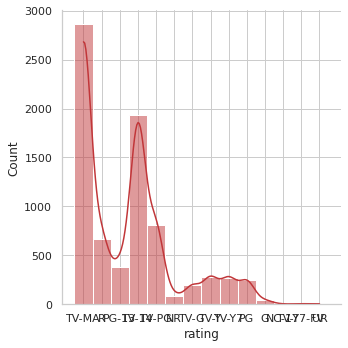

In [22]:
sns.displot(nf_df.rating, kde=True)

**'rating'**

In [23]:
# Checking the null value counts in 'rating'.
print("Number of null values in 'rating':" , nf_df.rating.isna().sum())
print("Percentage of null values in 'rating': {:.2f}%".format(nf_df.rating.isna().sum()*100/len(nf_df)))

Number of null values in 'rating': 7
Percentage of null values in 'rating': 0.09%


In [24]:
# Replacing the missing values of the 'rating' column with the most frequent rating(mode).
nf_df.rating.fillna(nf_df.rating.mode()[0], inplace= True)

In [25]:
# Dropping the remaining null value columns.
nf_df.dropna(inplace= True)

In [26]:
# Checking for null values.
nf_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
# Viewing index dtype and columns and memory usage.
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7787 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7787 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 790.9+ KB


# **Exploratory Data Analysis**

**Analysis on 'rating'**

Text(0.5, 1.0, 'Ratings for different types of content on Netflix')

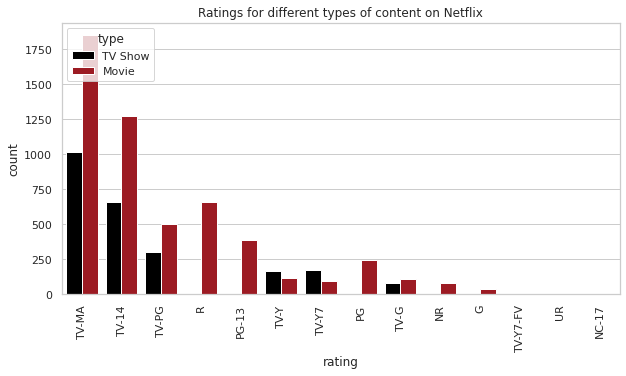

In [28]:
# Plotting different ratings for the different types of content.
fig= plt.figure(figsize=(10,5))
sns.countplot(nf_df.rating, hue=nf_df.type, order= nf_df.rating.value_counts().index, palette= [colors[0], colors[3]])
plt.xticks(rotation=90)
plt.title('Ratings for different types of content on Netflix')

In [29]:
# Endcoding different ratings based on the age categories.
rating_dict= {'TV-Y': 'Kids', 'TV-Y7': 'Kids', 'TV-Y7-FV': 'Kids', 'G': 'Kids', 'TV-G': 'Kids', 'PG': 'Kids', 'TV-PG': 'Kids', 'PG-13': 'Teens', 'TV-14': 'Teens', 'R': 'Adults', 'TV-MA': 'Adults', 'NC-17': 'Adults', 'NR': 'Adults', 'UR': 'Adults'}
nf_df['modified_rating']= nf_df.rating.map(rating_dict)

Text(0.5, 1.0, 'Counts of different types of Netflix content types')

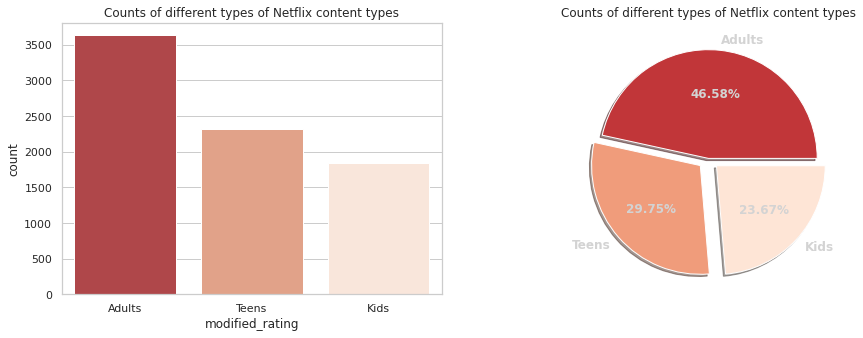

In [30]:
# Plotting different types of conent available on Netflix.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.modified_rating, ax=ax[0])
ax[0].set_title('Counts of different types of Netflix content types')
ax[1].pie(nf_df.modified_rating.value_counts(), labels = nf_df.modified_rating.value_counts().index, autopct='%1.2f%%', textprops={'color':'lightgray', 'fontsize':12, 'weight':'bold'}, explode = [0,0.1,0.1], shadow = True)
ax[1].set_title('Counts of different types of Netflix content types')
# sns.countplot(mod_nf_rating_df, ax=ax[2], hue=nf_df.type, palette= ['grey', colors[12]])
# ax[2].set_title('Counts of different types of Netflix content types')

**Observations:**
* From the first plot, we have observed that most of the ratings are applicable only for Movies.
* From the Netflix site reference, we came to know that,
  * TV-Y, TV-Y7, G, TV-G, PG, and TV-PG rated contents were belonging to **Kids**.
  * PG-13 and TV-14 rated content belong to **Teens**.
  * R, TV-MA, NC-17, NR, and UR are belongs to **Adults**.
* More than 46% of content was Adults focused, and only 23.65% for kids-focused.

**Analysis on 'type'**

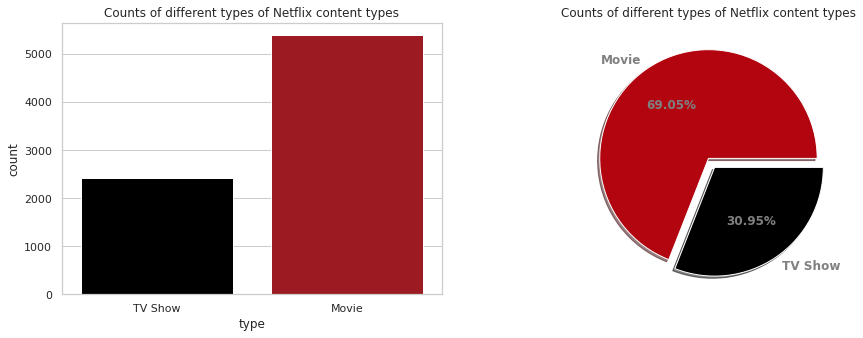

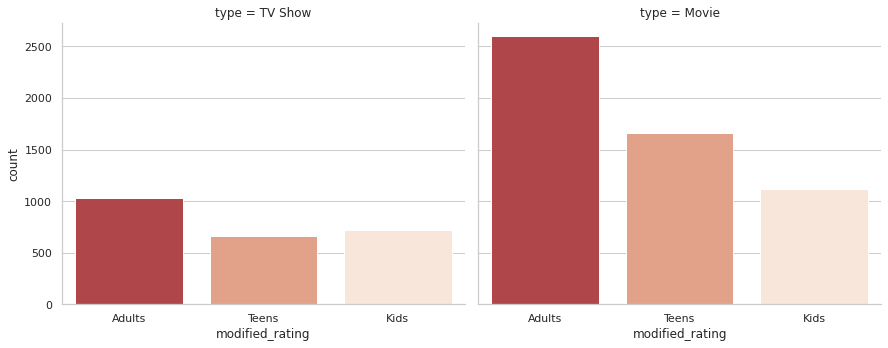

In [31]:
# Plotting different types of conent available on Netflix.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.type, ax=ax[0], palette= [colors[0], colors[3]])
ax[0].set_title('Counts of different types of Netflix content types')
ax[1].pie(nf_df.type.value_counts(), labels = nf_df.type.value_counts().index, autopct='%1.2f%%', textprops={'color':'gray', 'fontsize':12, 'weight':'bold'}, colors= [colors[3], colors[0]], explode = [0,0.1], shadow = True)
ax[1].set_title('Counts of different types of Netflix content types')
sns.catplot(x='modified_rating',col='type', data=nf_df, kind='count', aspect= 1.25)

**Observations:**
* In our overall data set 69.14% of the content was Movies and 30.86% of content was TV shows.
* And regardless of movies or TV shows, most of the contents belong to Adults rather than Teens and Kids.

**Analysis on 'country'**

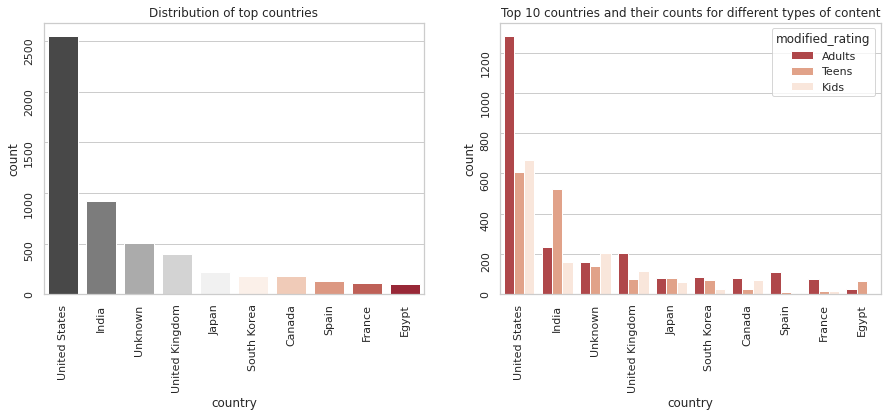

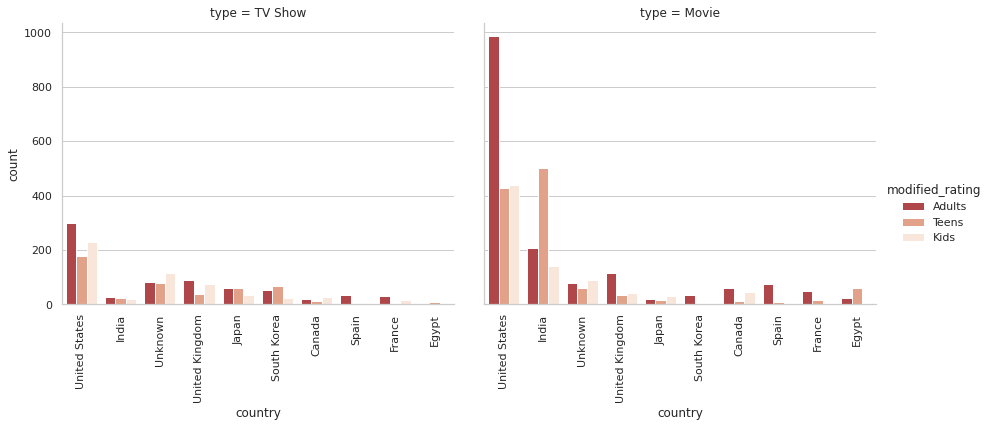

In [32]:
# Plotting the contents' count-based top countries.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df.country, order= nf_df.country.value_counts().index[:10], ax= ax[0], palette= 'RdGy_r')
ax[0].tick_params(rotation=90)
ax[0].set_title('Distribution of top countries')
sns.countplot(nf_df.country, hue=nf_df.modified_rating, order= nf_df.country.value_counts().index[:10])
ax[1].tick_params(rotation=90)
ax[1].set_title('Top 10 countries and their counts for different types of content')
p = sns.catplot(x='country',hue='modified_rating', col='type', data=nf_df, kind='count',order= nf_df.country.value_counts().index[:10], aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* We can clearly observe that the United States has more content in both TV shows and movies.
* India is second on this list.
* The overall focus was given to the Movies when compared with the TV shows.

**Analysis on 'release year'**

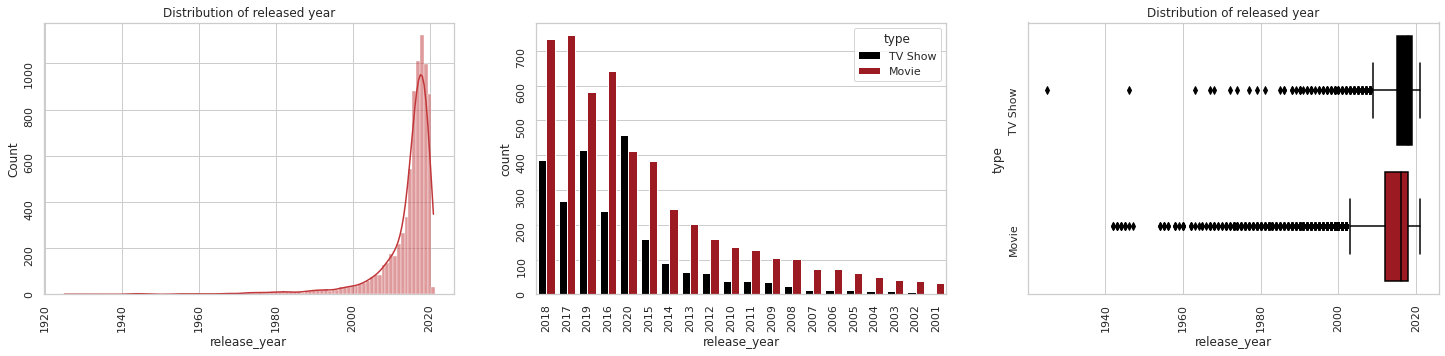

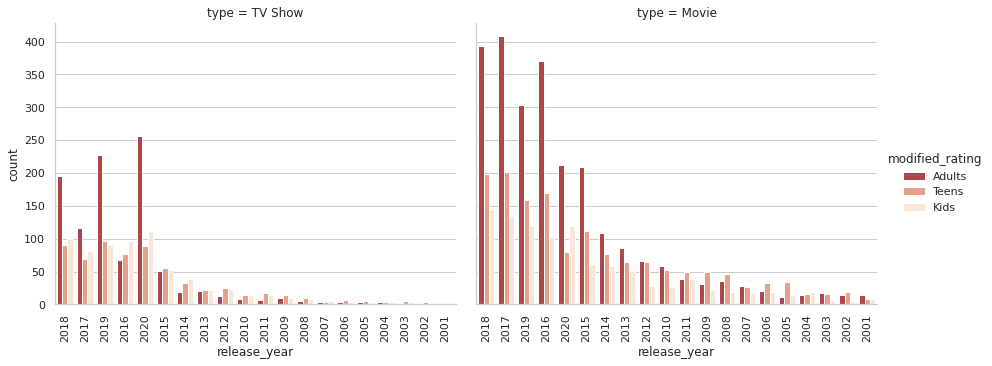

In [33]:
# Plotting release year for different available content.
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.histplot(x='release_year', data= nf_df, ax= ax[0], kde=True, discrete=True)
ax[0].tick_params(rotation=90)
ax[0].set_title('Distribution of released year')
ax[0].set_xlabel('release_year')
sns.countplot(x= 'release_year', hue='type', data= nf_df, order= nf_df.release_year.value_counts().index[:20], palette= [colors[0], colors[3]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_title('')
ax[1].set_xlabel('release_year')
sns.boxplot(x='release_year', y= 'type', data= nf_df, ax= ax[2], palette= [colors[0], colors[3]])
ax[2].tick_params(rotation=90)
ax[2].set_title('Distribution of released year')
p = sns.catplot(kind='count', x='release_year', hue='modified_rating', col='type', data=nf_df, order= nf_df.release_year.value_counts().index[:20],  aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* We can clearly say that 90% of the content was released between 2015 to 2020.
* Here also we can see that most of the content was Movies based rather than TV shows.

**Analysis on 'addded year'**

In [34]:
# Extracting the 'added year' from the 'added date'.
nf_df['added_year']= nf_df.date_added.dt.year

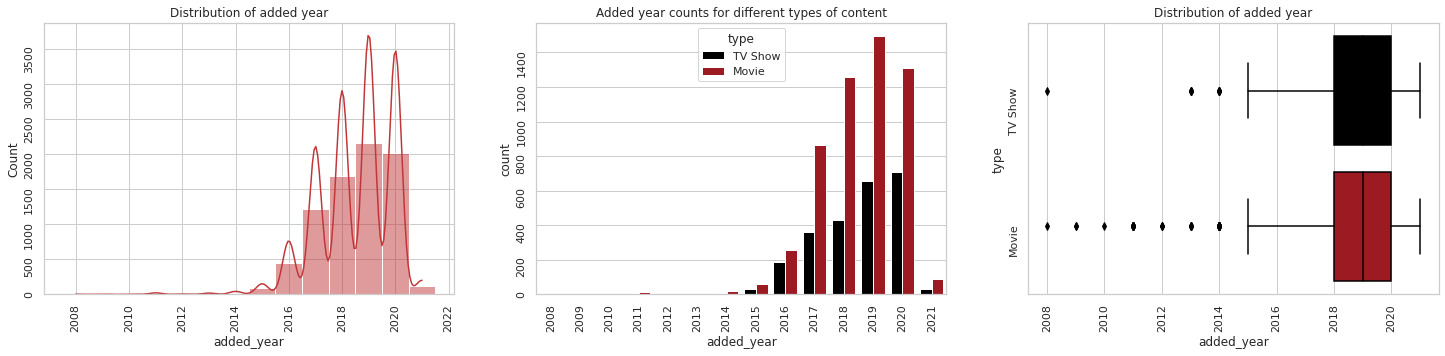

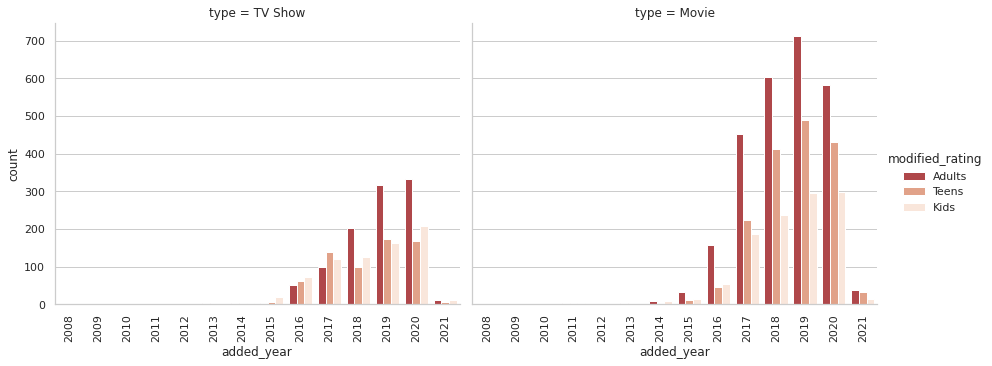

In [35]:
# Plotting added year for different available contents.
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.histplot(x= 'added_year', data= nf_df, ax= ax[0], kde=True, discrete=True)
ax[0].tick_params(rotation=90)
ax[0].set_title('Distribution of added year')
ax[0].set_xlabel('added_year')
sns.countplot(x= 'added_year', hue= 'type', data= nf_df, palette= [colors[0], colors[3]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_title('Added year counts for different types of content')
ax[1].set_xlabel('added_year')
sns.boxplot(x= 'added_year', y= 'type', data= nf_df, ax= ax[2], palette= [colors[0], colors[3]])
ax[2].tick_params(rotation=90)
ax[2].set_title('Distribution of added year')
p = sns.catplot(x='added_year', hue='modified_rating', col='type', data=nf_df, kind='count', aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* The results for this added year analysis has very much similar to the released year analysis.
* Most of the contents are added in the years between 2015 to 2020.
* Here also we can say that the focus has been given to Movies rather than TV shows.

**Analysis on 'added month'**

In [36]:
# Extracting the 'added month' from the 'added date'.
nf_df['added_month']= nf_df.date_added.dt.month
months= ['January', 'Febrary', 'March', 'April', 'May', 'June', 'July', 'August', 'september', 'October', 'November', 'December']

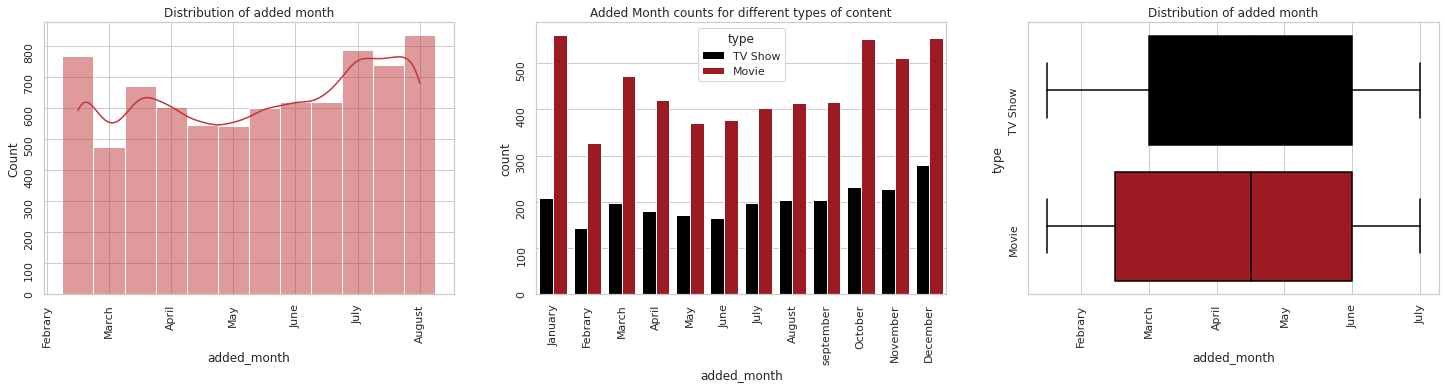

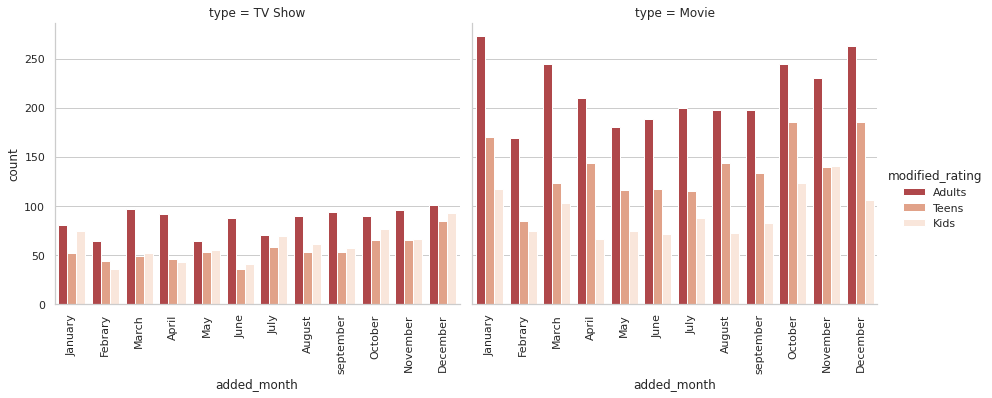

In [37]:
# Plotting added month for different available contents.
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.histplot(nf_df.added_month, ax= ax[0], kde=True, discrete=True)
ax[0].tick_params(rotation=90)
ax[0].set_xticklabels(months)
ax[0].set_title('Distribution of added month')
ax[0].set_xlabel('added_month')
sns.countplot(nf_df.added_month, hue=nf_df.type, palette= [colors[0], colors[3]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_xticklabels(months)
ax[1].set_title('Added Month counts for different types of content')
ax[1].set_xlabel('added_month')
sns.boxplot(x= 'added_month', y= 'type', data= nf_df, ax= ax[2], palette= [colors[0], colors[3]])
ax[2].set_xticklabels(months)
ax[2].tick_params(rotation=90)
ax[2].set_title('Distribution of added month')
p = sns.catplot(kind='count', x='added_month', hue='modified_rating', col='type', data=nf_df, aspect= 1.25)
p.set_xticklabels(labels= months, rotation=90)

**Observations:**
* All 12 months had a mostly similar amount of added content.
* Starting and ending of a year had a quite higher amount of added contents when comparing with the other middle ordered months.
* Here also we can clearly see that a higher amount of Movies has been added than the TV shows.

**Analysis on 'added week day'**

In [38]:
# Extracting the 'added day of the week' from the 'added date'.
nf_df['added_week_day']= nf_df.date_added.dt.dayofweek


week_days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

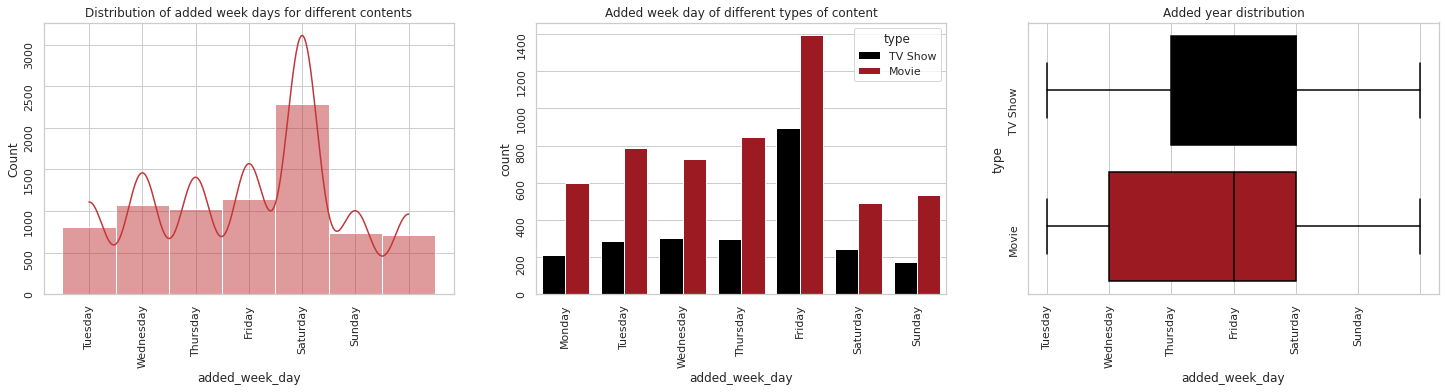

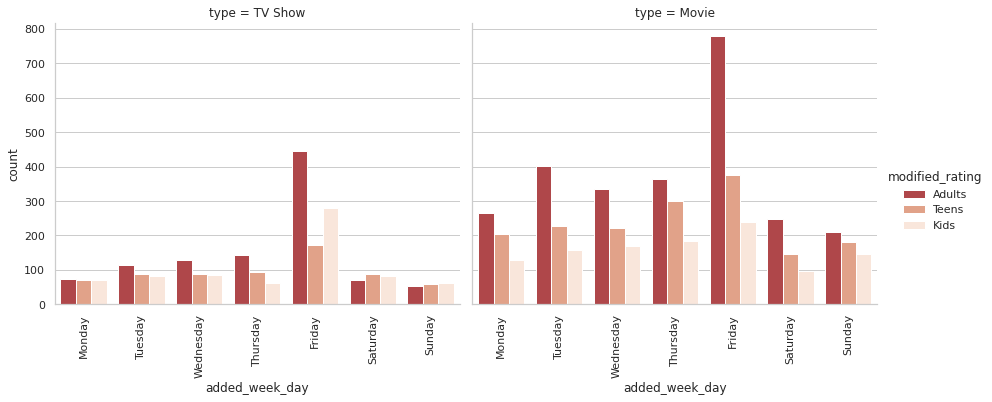

In [39]:
# Plotting added day of the week for different available contents.
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.histplot(x= 'added_week_day', data= nf_df, ax= ax[0], kde=True, discrete=True, palette= 'RdGy')
ax[0].set_xticklabels(week_days)
ax[0].tick_params(rotation=90)
ax[0].set_title('Distribution of added week days for different contents')
ax[0].set_xlabel('added_week_day')
sns.countplot(x= 'added_week_day', hue='type', data= nf_df, palette= [colors[0], colors[3]], ax= ax[1])
ax[1].set_xticklabels(week_days)
ax[1].tick_params(rotation=90)
ax[1].set_title('Added week day of different types of content')
ax[1].set_xlabel('added_week_day')
sns.boxplot(x= 'added_week_day', y= 'type', data= nf_df, ax= ax[2], palette= [colors[0], colors[3]])
ax[2].set_xticklabels(week_days)
ax[2].tick_params(rotation=90)
ax[2].set_title('Added year distribution')
p = sns.catplot(kind='count', x='added_week_day', hue='modified_rating', col='type', data=nf_df, aspect= 1.25)
p.set_xticklabels(labels= week_days, rotation=90)

**Observations:**
* We can clearly observe a huge spike on Fridays since it is the start of weekends.
* And a little less at the end of the weekends.

**Analysis on 'directors'**

Text(0.5, 0, 'director')

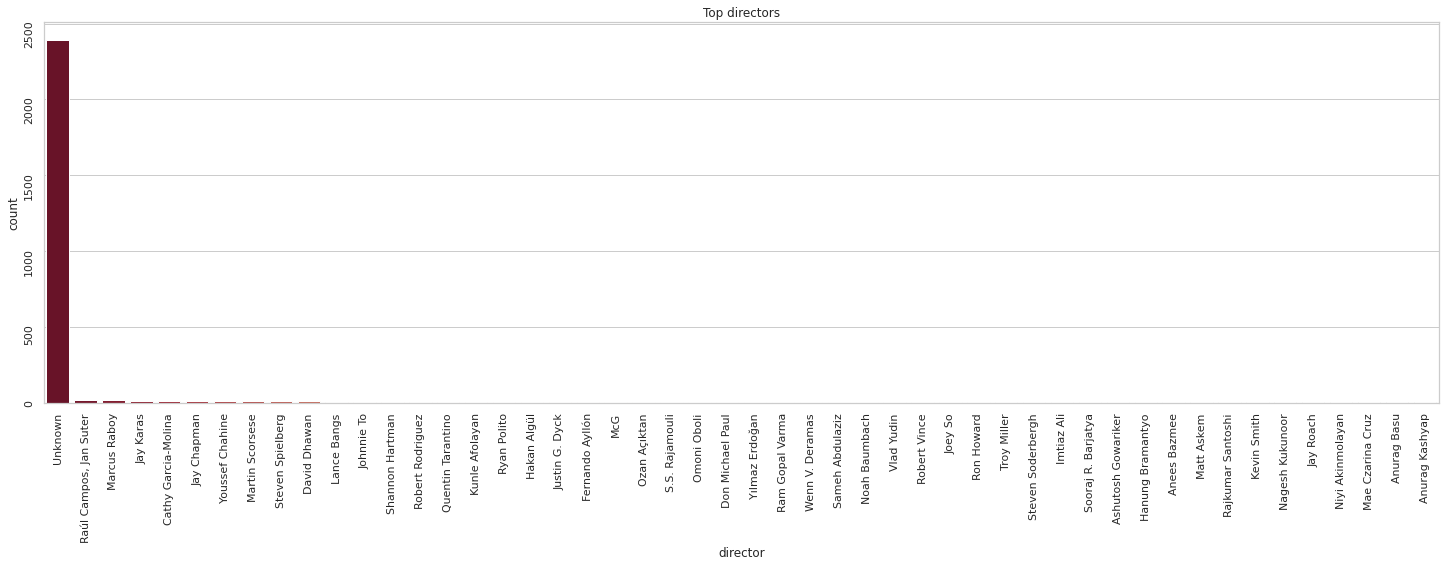

In [40]:
# Plotting directors for different available contents.
fig = plt.figure(figsize=(25,7))
ax = fig.gca()
sns.countplot(nf_df.director, order= nf_df.director.value_counts().index[:50], palette= 'RdGy')
# ax[0].set_xticklabels(week_days)
ax.tick_params(rotation=90)
ax.set_title('Top directors')
ax.set_xlabel('director')

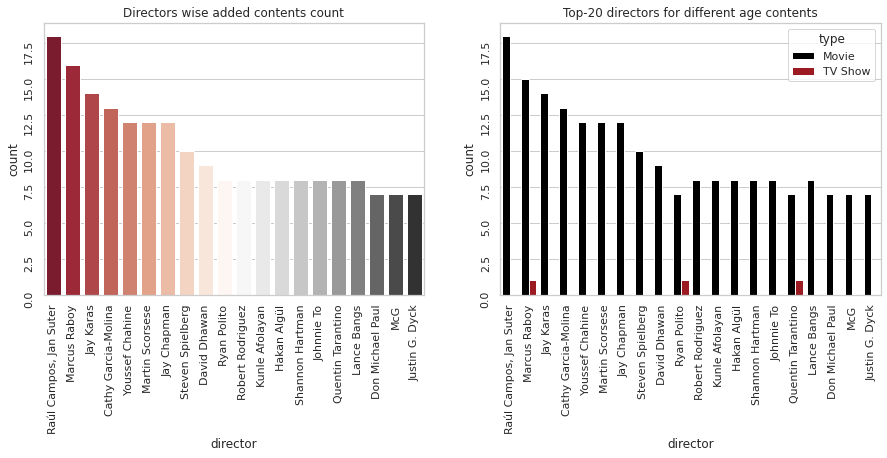

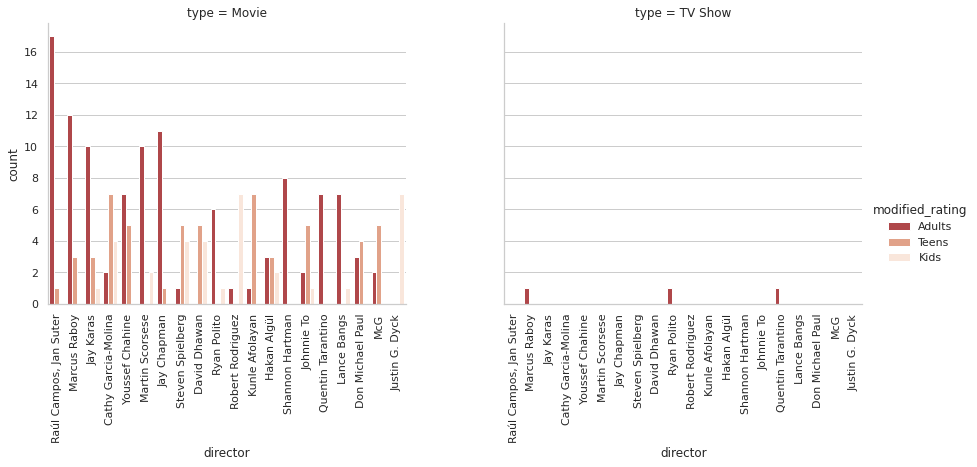

In [41]:
# Plotting directors for different available contents.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(nf_df[nf_df.director != 'Unknown'].director, order= nf_df[nf_df.director != 'Unknown'].director.value_counts().index[:20], ax= ax[0], palette= 'RdGy')
# ax[0].set_xticklabels(week_days)
ax[0].tick_params(rotation=90)
ax[0].set_title('Directors wise added contents count')
ax[0].set_xlabel('director')
sns.countplot(x= 'director', hue='type', data= nf_df[nf_df.director != 'Unknown'], order= nf_df[nf_df.director != 'Unknown'].director.value_counts().index[:20], palette= [colors[0], colors[3]], ax= ax[1])
# ax[1].set_xticklabels(week_days)
ax[1].tick_params(rotation=90)
ax[1].set_title('Top-20 directors for different age contents')
ax[1].set_xlabel('director')
p = sns.catplot(kind='count', x='director', hue='modified_rating', col='type', data=nf_df[nf_df.director != 'Unknown'], order= nf_df[nf_df.director != 'Unknown'].director.value_counts().index[:20], aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* From the first plot, we can observe that most of the content directors are 'Unknown' for TV shows.
* Movies had the most known directors.

**Analysis on 'cast'**

In [42]:
# Extract individual cast contributions from the 'cast' column.
actors_dict= {}
for i, actors in nf_df.cast.iteritems():
  for actor in actors.split(', '):
    if actor not in actors_dict.keys():
      actors_dict[actor]= 1
    else:
      actors_dict[actor] += 1
actors_dict= dict(sorted(actors_dict.items() , key= lambda x: x[1], reverse = True))

print('The total number of cast on Netflix data set: ',len(actors_dict))

The total number of cast on Netflix data set:  32882


Text(0.5, 0, 'actors')

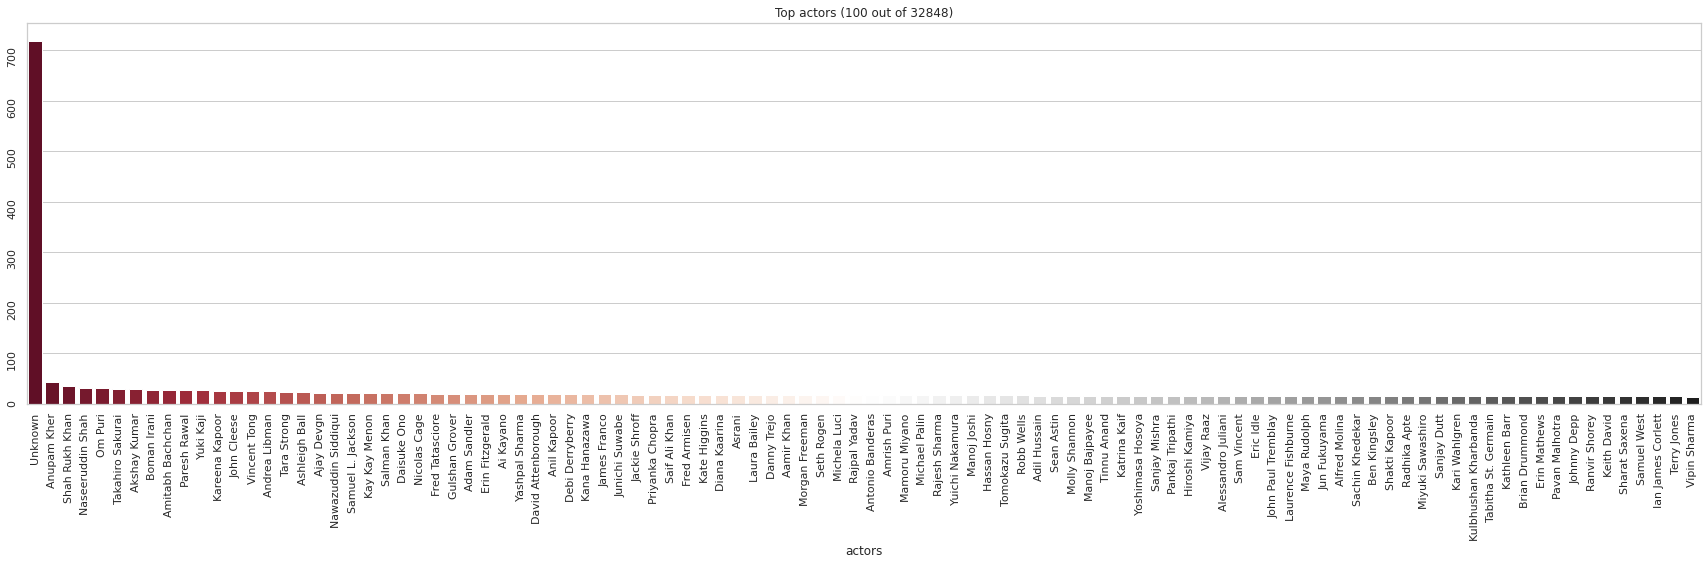

In [43]:
# Plotting directors for different available contents.
fig = plt.figure(figsize=(30,7))
ax = fig.gca()
sns.barplot(x=list(actors_dict.keys())[:100], y= list(actors_dict.values())[:100], palette= 'RdGy')
ax.tick_params(rotation=90)
ax.set_title('Top actors (100 out of 32848)')
ax.set_xlabel('actors')

**Observations:**
* For most of the contents the Cast was 'Unknown'.
* Anupam Kher was in 2nd place followed by Shah Rukh Khan.
* Akshay Kumar and Amitabh Bachchan were also in the top 10 actors list.

**Analysis on 'duaration of movies'**

In [44]:
# Extracting the total duration of the movies from the 'duration' column.
nf_df_movie_length= nf_df.loc[nf_df.type == 'Movie', ['duration']]
nf_df_movie_length= nf_df_movie_length.duration.apply(lambda x: int(x.split()[0])).values

Text(0.5, 0, 'duration in (minutes)')

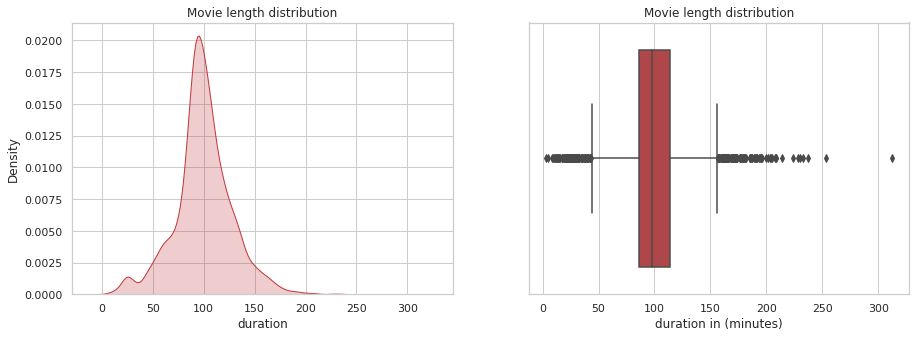

In [45]:
# Plotting Movie duration distribution.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(x= nf_df_movie_length, ax= ax[0], fill= True)
ax[0].set_title('Movie length distribution')
ax[0].set_xlabel('duration')
sns.boxplot(x= nf_df_movie_length, ax= ax[1])
ax[1].set_title('Movie length distribution')
ax[1].set_xlabel('duration in (minutes)')

**Observations:**
* More than 80% of the movies had 100+ minutes of duration.
* only less than 10% percentage of the movies were less than 50 minutes.

**Analysis on 'seasons of TV shows'**

In [46]:
# Extracting the number of seasons of the TV shows from the 'duration' column.
nf_df_tv_show_length= nf_df.loc[nf_df.type== 'TV Show', ['duration']]
nf_df_tv_show_length= nf_df_tv_show_length.duration.apply(lambda x: int(x.split()[0])).values

Text(0.5, 0, 'Seasons')

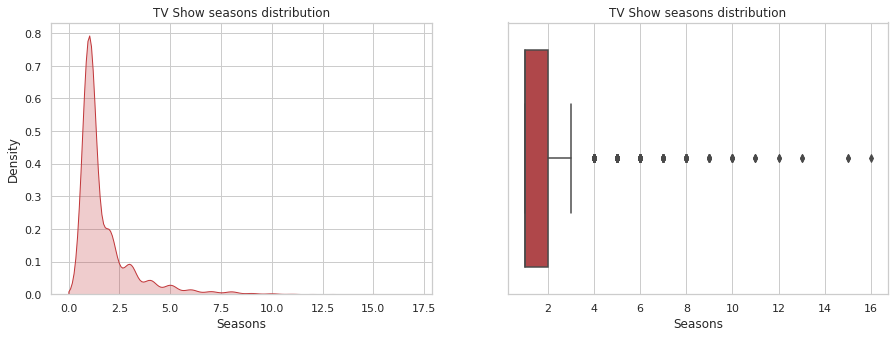

In [47]:
# Plotting TV Show seasons distribution.
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(x= nf_df_tv_show_length, ax= ax[0], fill= True)
ax[0].set_title('TV Show seasons distribution')
ax[0].set_xlabel('Seasons')
sns.boxplot(x= nf_df_tv_show_length, ax= ax[1])
ax[1].set_title('TV Show seasons distribution')
ax[1].set_xlabel('Seasons')

**Observations:**
* 95% percentage of the TV shows are having only 2 seasons.
* less than 1 percentage of the TV shows had 5+ seasons.

**Analysis on 'listed in (genres)'**

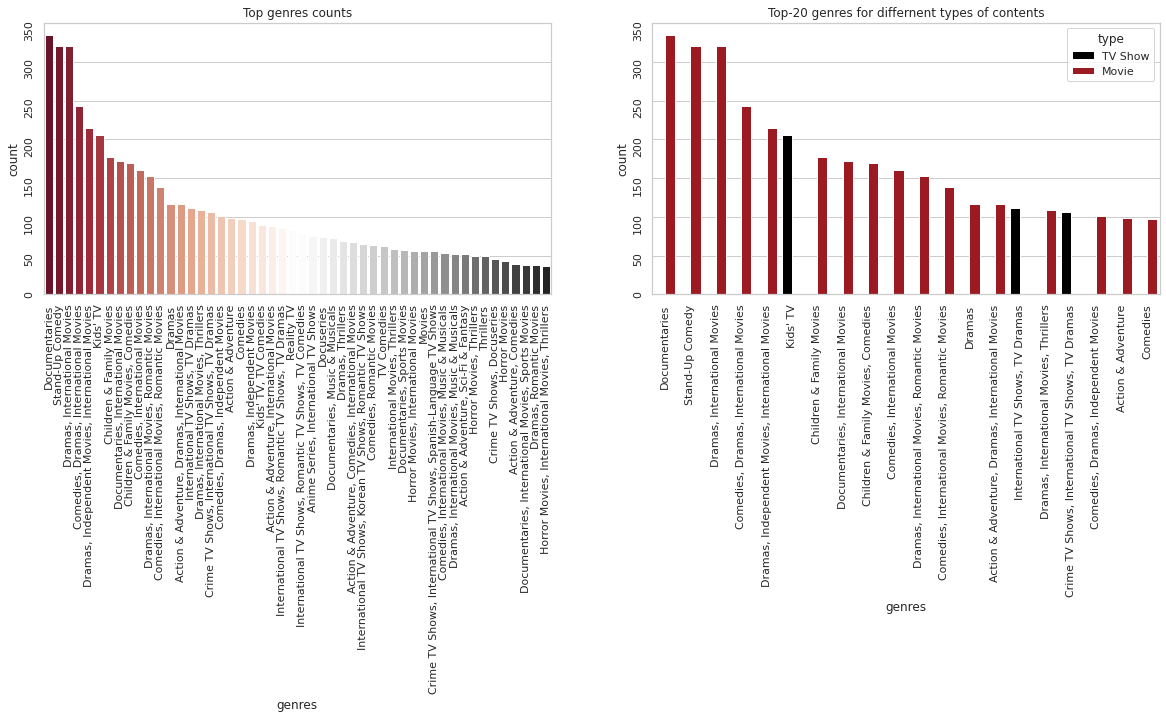

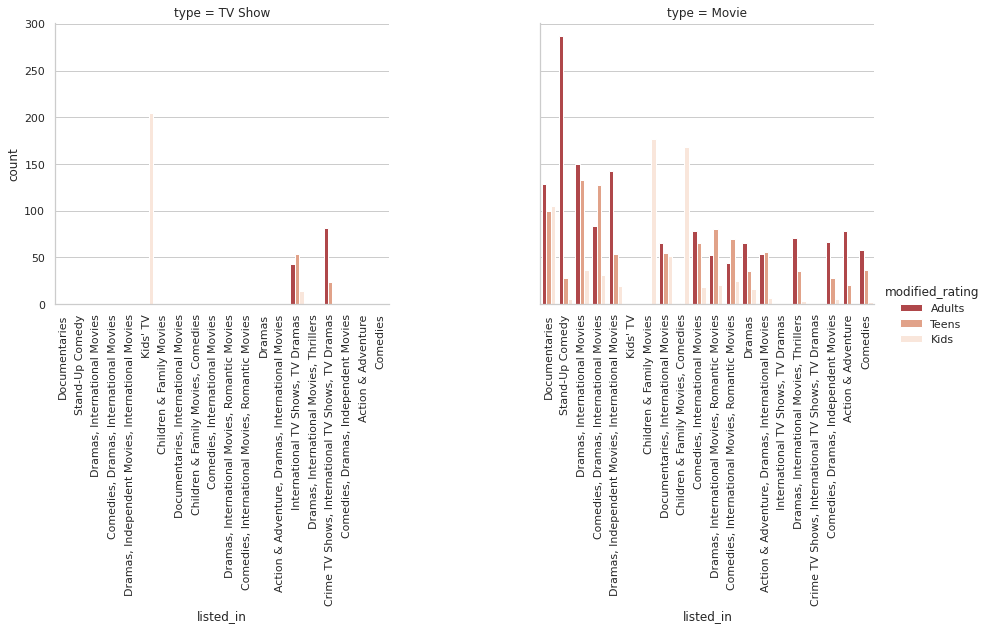

In [48]:
# Plotting different 'genres'.
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.countplot(x='listed_in', data= nf_df, order= nf_df.listed_in.value_counts().index[:50], ax= ax[0], palette= 'RdGy')
ax[0].tick_params(rotation=90)
ax[0].set_title('Top genres counts')
ax[0].set_xlabel('genres')
sns.countplot(x= 'listed_in', hue='type', data= nf_df, order= nf_df.listed_in.value_counts().index[:20], palette= [colors[0], colors[3]], ax= ax[1])
ax[1].tick_params(rotation=90)
ax[1].set_title('Top-20 genres for differnent types of contents')
ax[1].set_xlabel('genres')
p = sns.catplot(kind='count', x='listed_in', hue='modified_rating', col='type', data=nf_df, order= nf_df.listed_in.value_counts().index[:20], aspect= 1.25)
p.set_xticklabels(rotation=90)

**Observations:**
* Mostly movies have been contributed in different varieties of genres.
* TV shows had mostly focused on kids’ programs.

**Analysis on 'title'**

In [49]:
# Importing and downloading dependencies for NLP.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
# Creating 'English' stop words list
sw_en= stopwords.words('english')
print(sw_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
# Creating a data frame for the top frequently occurring words in the 'title'.
title_words_dict= {}
for i, title in nf_df.title.iteritems():
  title= ''.join([s for s in title if s not in string.punctuation])
  for word in title.split():
    if word.lower() not in sw_en:
      if word.lower() not in title_words_dict.keys():
        title_words_dict[word.lower()]= 1
      else:
        title_words_dict[word.lower()] += 1
    else:
      pass
title_words_dict= dict(sorted(title_words_dict.items(), key= lambda x: x[1], reverse= True))
print(title_words_dict)

{'love': 151, '2': 113, 'christmas': 78, 'man': 74, 'story': 67, 'life': 64, 'world': 63, 'movie': 60, 'little': 58, 'one': 54, 'time': 53, 'last': 49, 'de': 46, 'high': 45, 'la': 45, 'live': 44, 'american': 44, 'el': 43, 'black': 43, 'house': 42, 'girls': 42, 'power': 42, 'super': 38, 'day': 37, 'city': 35, 'night': 35, 'new': 35, 'game': 34, 'first': 33, 'family': 33, 'rangers': 33, '3': 32, 'girl': 32, 'good': 31, 'show': 31, 'war': 31, 'monster': 30, 'special': 30, 'go': 30, 'king': 30, 'boy': 29, 'us': 29, 'great': 29, 'stories': 27, 'school': 27, 'club': 27, 'dark': 27, 'baby': 26, 'boys': 26, 'big': 26, 'friends': 26, 'mr': 26, 'bad': 25, 'two': 25, 'legend': 25, 'killer': 25, 'days': 24, 'hai': 24, 'kill': 23, 'secret': 23, 'happy': 23, 'secrets': 23, 'kids': 23, 'tales': 22, 'next': 22, 'true': 22, 'back': 22, 'wild': 22, 'death': 22, 'heart': 21, 'ghost': 21, 'adventures': 21, 'fire': 21, 'miss': 21, 'version': 21, 'monsters': 21, 'prince': 20, 'white': 20, 'lost': 20, 'nova'

In [52]:
len(title_words_dict)

8344

In [53]:
# Converting word counts dictionary into a sorted pandas data frame.
words_freuency_in_titles_df= pd.DataFrame(title_words_dict.values(),title_words_dict.keys()).reset_index().rename(columns= {'index': 'words_in_titles', 0:'frequency'})
words_freuency_in_titles_df.head()

,words_in_titles,frequency
0,love,151
1,2,113
2,christmas,78
3,man,74
4,story,67


Text(0.5, 0, 'Words in title')

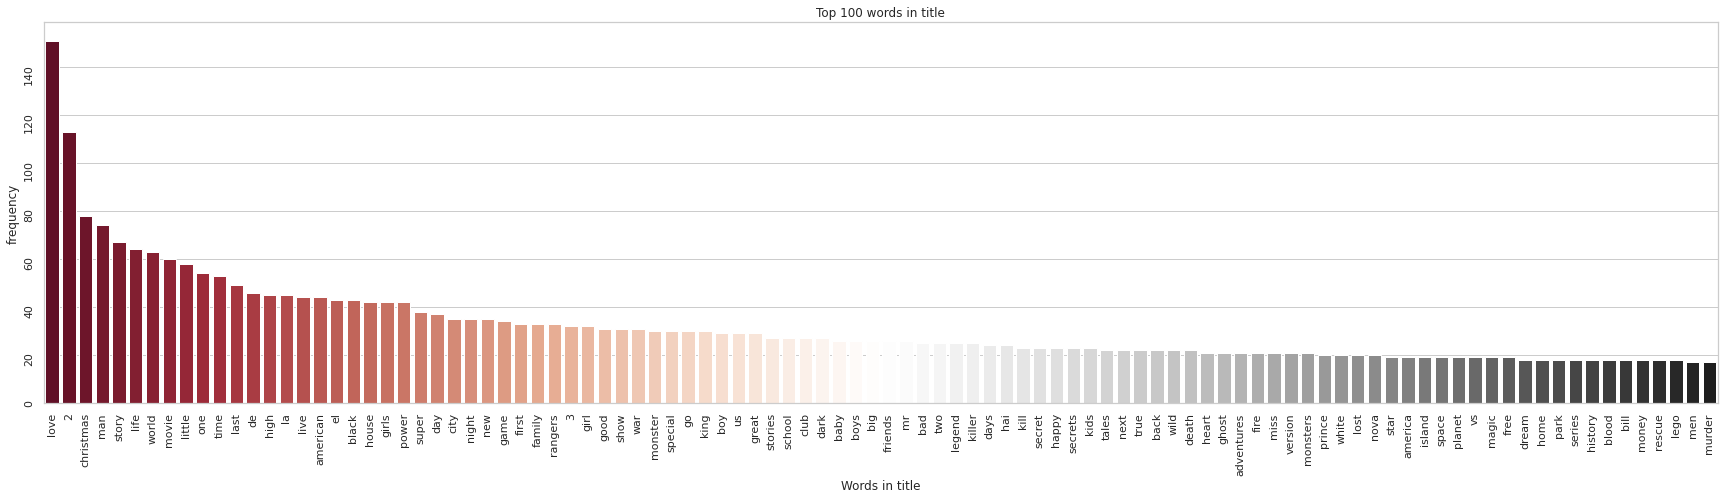

In [54]:
# Plotting Top words used in titles.
fig = plt.figure(figsize=(30,7))
ax = fig.gca()
sns.barplot(x='words_in_titles', y= 'frequency', data= words_freuency_in_titles_df, order= words_freuency_in_titles_df.words_in_titles[:100], palette= 'RdGy')
ax.tick_params(rotation=90)
ax.set_title('Top 100 words in title')
ax.set_xlabel('Words in title')

**Observations:**
* It gives some interesting observations.
* More than 150 titles consisting of the word **'love'**
* 80+ movies had the words **'Christmas'** and number **'2'**

**Ovear all EDA conclusion:**
* Most of the contents were added between the years 2015 - 2020.
* Most of the contents were only suitable for adults.
* Counties like the United States, India, Japan, South Korea, and Canada contents were contributing a lot.
* From overall Netflix is focusing more on **Movies** than TV shows.

# **Analysis on text features**

## **Implementation of Natural Language Processing (NLP)**

In [55]:
# Viewing the 'listed_in' feature values.
nf_df.listed_in.head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

In [56]:
# Viewing the 'description' feature values.
nf_df.description.head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

### Text preprocessing

In [57]:
# Calculating counties' frequency of occurrence.
countries_dict= {}
for i, countries in nf_df.country.iteritems():
  for count in countries.split(', '):
    if count not in countries_dict.keys():
      countries_dict[count]= 1
    else:
      countries_dict[count] += 1
countries_dict_new= dict(sorted(countries_dict.items() , key= lambda x: x[1], reverse = True))

print('Total number of counties in Netflix: ',len(countries_dict_new))

Total number of counties in Netflix:  122


In [58]:
# Top countries’ contributions.
print(countries_dict_new)

{'United States': 3296, 'India': 990, 'United Kingdom': 722, 'Unknown': 507, 'Canada': 412, 'France': 349, 'Japan': 287, 'Spain': 215, 'South Korea': 212, 'Germany': 199, 'Mexico': 154, 'China': 147, 'Australia': 144, 'Egypt': 110, 'Turkey': 108, 'Hong Kong': 102, 'Italy': 90, 'Brazil': 88, 'Taiwan': 85, 'Belgium': 85, 'Argentina': 82, 'Indonesia': 80, 'Philippines': 78, 'Nigeria': 76, 'Thailand': 65, 'South Africa': 54, 'Netherlands': 45, 'Colombia': 45, 'Denmark': 44, 'Ireland': 40, 'Singapore': 39, 'Sweden': 39, 'Poland': 35, 'United Arab Emirates': 34, 'Norway': 29, 'New Zealand': 28, 'Russia': 27, 'Israel': 26, 'Chile': 26, 'Lebanon': 26, 'Malaysia': 26, 'Pakistan': 24, 'Czech Republic': 20, 'Switzerland': 17, 'Uruguay': 14, 'Romania': 12, 'Luxembourg': 11, 'Finland': 11, 'Austria': 11, 'Peru': 10, 'Saudi Arabia': 10, 'Greece': 10, 'Iceland': 9, 'Bulgaria': 9, 'Hungary': 9, 'Jordan': 8, 'Serbia': 7, 'Qatar': 7, 'Kuwait': 7, 'Morocco': 6, 'Kenya': 5, 'Vietnam': 5, 'West Germany': 5

In [59]:
# Since a huge number of counties were involved we can use the most common languages for removing stop words.
common_languages= ['chinese', 'english', 'french', 'german', 'spanish', 'turkish']
all_stop_words= []
for lang in common_languages:
  all_stop_words+=stopwords.words(lang)
len(all_stop_words)

1775

In [60]:
# Creating a function for removing the punctuations and stop words from any text.
def preprocess_text(txt):
  '''this fucntion will takes a full sentence of text,
   and will remove punctions and stop words(en)'''
  translator= str.maketrans('', '', string.punctuation)
  nopunc_txt= txt.translate(translator)
  cleaned_txt= ' '.join([word.lower() for word in nopunc_txt.split() if word.lower() not in all_stop_words]) 
  return cleaned_txt

In [61]:
# Applying text pre-processing on the 'listed_in' column.
nf_df['listed_in']= nf_df.listed_in.apply(preprocess_text)
nf_df.listed_in.head()

0    international tv shows tv dramas tv scifi fantasy
1                          dramas international movies
2                   horror movies international movies
3    action adventure independent movies scifi fantasy
4                                               dramas
Name: listed_in, dtype: object

In [62]:
# Applying text pre-processing on the 'description' column.
nf_df['description']= nf_df.description.apply(preprocess_text)
nf_df.description.head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: description, dtype: object

### Implementation of Stemming

In [63]:
# Importing Snow Ball stemmer dependencies.
from nltk.stem import SnowballStemmer

In [64]:
# Creating an object for Snow ball stemmer.
snow_stem_en= SnowballStemmer('english')

In [65]:
# Creating a function for applying stemming.
def apply_stemming(txt):
  '''This function will take text as input and return stemmed text as output.'''
  text= ' '.join([snow_stem_en.stem(word) for word in txt.split()])
  return text

In [66]:
# Applying stemming on the 'listed_in' column.
nf_df['listed_in']= nf_df.listed_in.apply(apply_stemming)
nf_df.listed_in.head()

0       intern tv show tv drama tv scifi fantasi
1                              drama intern movi
2                        horror movi intern movi
3    action adventur independ movi scifi fantasi
4                                          drama
Name: listed_in, dtype: object

In [67]:
# Applying stemming on the 'description' column
nf_df['description']= nf_df.description.apply(apply_stemming)
nf_df.description.head()

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
Name: description, dtype: object

### Implementation of Count Vectorizer

---



**words frequency analysis on 'listed_in'**

In [68]:
# Import dependencies for text vectorization.
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
# Creating a count vectorizer object and fitting it in the 'listed_in' text.
count_vectorizer = CountVectorizer()
count_vectorizer.fit(netflix_df.listed_in)

# Getting the most frequently occurring words.
listed_in_words_frequency= count_vectorizer.vocabulary_.items()

In [70]:
listed_in_words_frequency_dict= dict(sorted(listed_in_words_frequency, key= lambda x: x[1], reverse= True))
print(listed_in_words_frequency_dict)

{'up': 44, 'tv': 43, 'thrillers': 42, 'teen': 41, 'talk': 40, 'stand': 39, 'sports': 38, 'spirituality': 37, 'spanish': 36, 'shows': 35, 'series': 34, 'science': 33, 'sci': 32, 'romantic': 31, 'reality': 30, 'nature': 29, 'mysteries': 28, 'musicals': 27, 'music': 26, 'movies': 25, 'lgbtq': 24, 'language': 23, 'korean': 22, 'kids': 21, 'international': 20, 'independent': 19, 'horror': 18, 'fi': 17, 'features': 16, 'fantasy': 15, 'family': 14, 'faith': 13, 'dramas': 12, 'docuseries': 11, 'documentaries': 10, 'cult': 9, 'crime': 8, 'comedy': 7, 'comedies': 6, 'classic': 5, 'children': 4, 'british': 3, 'anime': 2, 'adventure': 1, 'action': 0}


In [71]:
# Converting word counts dictionary into a sorted pandas data frame.
listed_in_word_df= pd.DataFrame(listed_in_words_frequency_dict.items()).rename(columns= {0: 'word', 1: 'count'})
listed_in_word_df.head()

,word,count
0,up,44
1,tv,43
2,thrillers,42
3,teen,41
4,talk,40


Text(0.5, 1.0, "Distribution of top words in 'listed_in'")

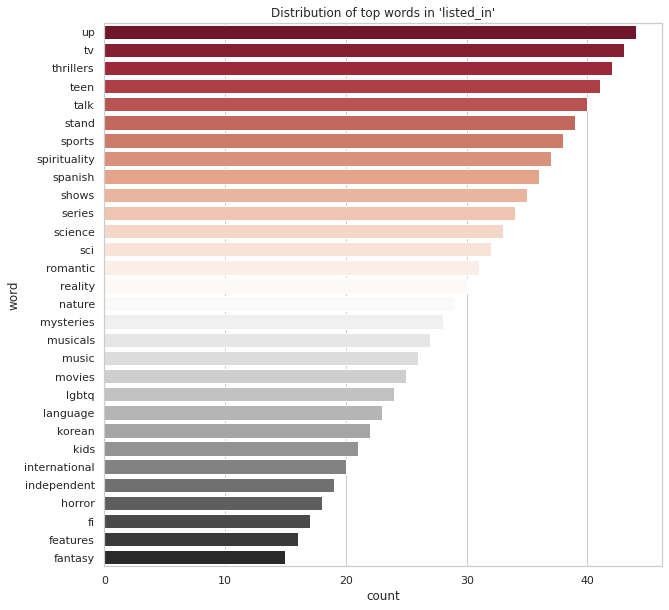

In [72]:
# Plotting top frequently occurring words in the column 'listed_in'.
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.barplot(x='count', y= 'word', data= listed_in_word_df, order= listed_in_word_df.word[:30], palette= 'RdGy')
ax.set_title("Distribution of top words in 'listed_in'")

**Observations:**
* 'Up' is the most used word in the listed in (genres).
* Words like TV, Thrillers, teen, talk sports science, and romantic are having considerable amount of counts.
* Most of the top words are belongs to the English language.

**words frequency analysis on 'description'**

In [73]:
# Creating a count vectorizer object and fitting it in the 'description' text.
count_vectorizer = CountVectorizer()
count_vectorizer.fit(netflix_df.description)

# Getting the most frequently occurring words in 'description'.
description_words_frequency= count_vectorizer.vocabulary_.items()

In [74]:
description_words_frequency_dict= dict(sorted(description_words_frequency, key= lambda x: x[1], reverse= True))
print(description_words_frequency_dict)

{'şeref': 18167, 'ōarai': 18166, 'łukasz': 18165, 'über': 18164, 'ömer': 18163, 'émile': 18162, 'ángel': 18161, 'álvaro': 18160, 'álex': 18159, 'zé': 18158, 'zurich': 18157, 'zumbo': 18156, 'zulu': 18155, 'zuhu': 18154, 'zuckerberg': 18153, 'zoé': 18152, 'zozo': 18151, 'zoya': 18150, 'zorro': 18149, 'zordon': 18148, 'zoologist': 18147, 'zoo': 18146, 'zones': 18145, 'zone': 18144, 'zombies': 18143, 'zombie': 18142, 'zola': 18141, 'zoids': 18140, 'zoey': 18139, 'zoe': 18138, 'zodiac': 18137, 'zixin': 18136, 'zisman': 18135, 'zirkus': 18134, 'zips': 18133, 'zippy': 18132, 'zipper': 18131, 'zip': 18130, 'zion': 18129, 'zin': 18128, 'zimmer': 18127, 'zimbabwe': 18126, 'zim': 18125, 'zika': 18124, 'zig': 18123, 'zhi': 18122, 'zhen': 18121, 'zhang': 18120, 'zhan': 18119, 'zha': 18118, 'zev': 18117, 'zeus': 18116, 'zesty': 18115, 'zero': 18114, 'zeo': 18113, 'zenos': 18112, 'zenko': 18111, 'zenithian': 18110, 'zenith': 18109, 'zen': 18108, 'zemdegs': 18107, 'zeliha': 18106, 'zeina': 18105, 'ze

In [75]:
# Converting word counts dictionary into a sorted pandas data frame.
description_word_df= pd.DataFrame(description_words_frequency_dict.items()).rename(columns= {0: 'word', 1: 'count'})
description_word_df.head()

,word,count
0,şeref,18167
1,ōarai,18166
2,łukasz,18165
3,über,18164
4,ömer,18163


Text(0.5, 1.0, "Distribution of top words in 'description'")

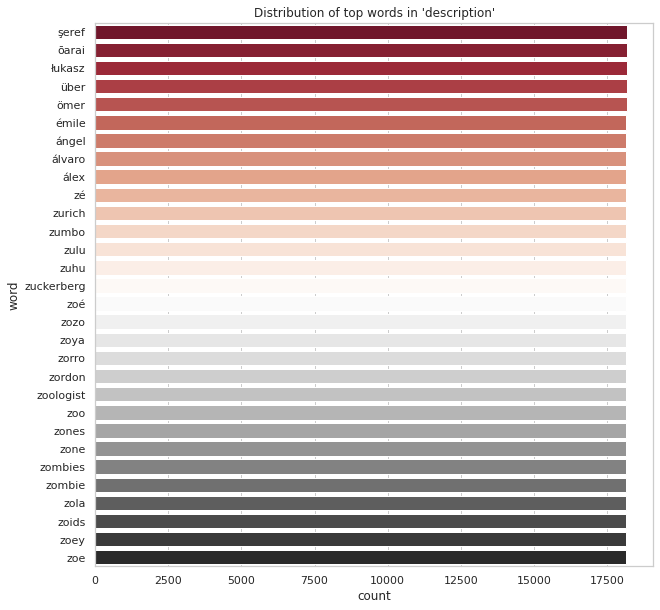

In [76]:
# Plotting top frequently occurring words in the column 'description'.
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.barplot(x='count', y= 'word', data= description_word_df, order= description_word_df.word[:30], palette= 'RdGy')
ax.set_title("Distribution of top words in 'description'")

**Observations:**
* It shows some interesting results.
* Most of the words are used more than 18000 times.
* Very less English words are contributed to the top frequently used words in the description.

# **Preparation of data set for modeling**

### Preparing the clusting data set

In [77]:
# Creating separate columns for listed_in length, and description length.
nf_df['listed_in_length']= nf_df.listed_in.apply(lambda lis: len(lis))
nf_df['description_length']= nf_df.description.apply(lambda des: len(des))

In [78]:
# Creating the final cluster data frame.
cluster_df= nf_df[['listed_in_length', 'description_length']]
cluster_df.head()

,listed_in_length,description_length
0,40,82
1,17,88
2,23,102
3,43,89
4,5,95


### Standardizing  the values to generalize

In [79]:
# Importing dependencies for standardization.
from sklearn.preprocessing import StandardScaler

In [80]:
# Standardizing the data set.
scaler= StandardScaler()
X= nf_df[['listed_in_length', 'description_length']]
X_scaled= scaler.fit_transform(X)
X_scaled

array([[ 1.46615694, -0.9527745 ],
       [-0.68546318, -0.40403333],
       [-0.12417097,  0.87636274],
       ...,
       [ 0.99841344,  0.14470785],
       [ 0.06292643,  1.15073333],
       [-0.12417097, -0.40403333]])

In [81]:
# Shape of the standardized data.
X_scaled.shape

(7787, 2)

### Until now

We have prepared and scaled our data set for applying the ML models, our dataset doesn't have any target variable to predict, and as given in the problem statement we have to apply some Unsupervised Machine learning models to make some clusters out from the dataset.

# **Implementation of K-Means Clustering**

In [82]:
# Importing dependencies to implement K-Means.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from prettytable import PrettyTable

In [83]:
# Creating a function to calculate and silhouette score table.
def create_silhuouette_scores_table(X, model, n_range):
  '''This function will take X_values, model , and n_clusters as input, 
  and can draw the silhouette scores table.'''
  table=PrettyTable()
  sil_score_dict= {}
  for n in n_range:
    model_object= model(n_clusters=n)
    y_pred= model_object.fit_predict(X)
    sil_score= silhouette_score(X, y_pred)
    sil_score_dict[n]= round(sil_score, 4)
  table.add_column('n_clusters', list(sil_score_dict.keys()))
  table.add_column('silhouette_score', list(sil_score_dict.values()))
  print(table)

### K-Means implementation and plotting

For n_clusters: 2, and average silhouette_score is: 0.3363227360314823
For n_clusters: 3, and average silhouette_score is: 0.34939656843317574
For n_clusters: 4, and average silhouette_score is: 0.3165499683508236
For n_clusters: 5, and average silhouette_score is: 0.3082246379901403
For n_clusters: 6, and average silhouette_score is: 0.3279395634487255
For n_clusters: 7, and average silhouette_score is: 0.3309802818747001
For n_clusters: 8, and average silhouette_score is: 0.3220693774445939
For n_clusters: 9, and average silhouette_score is: 0.32287539552959515


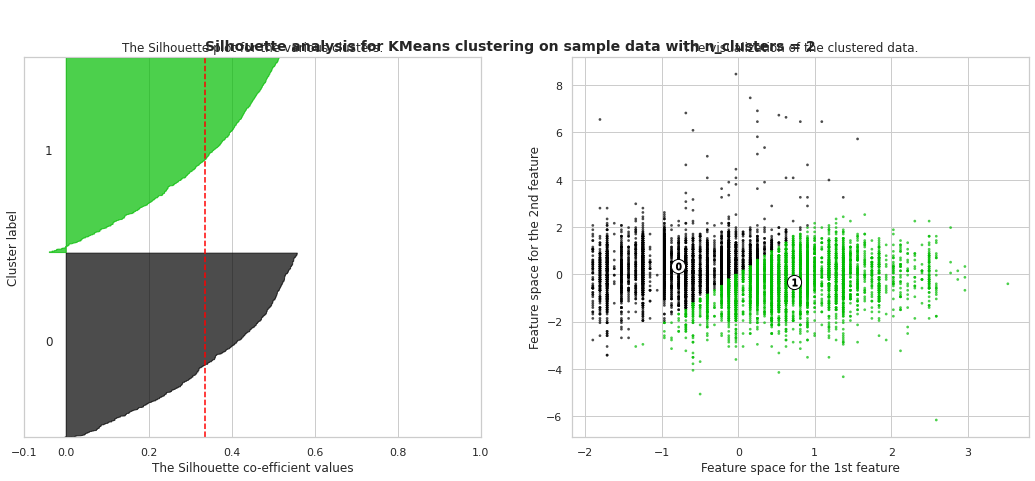

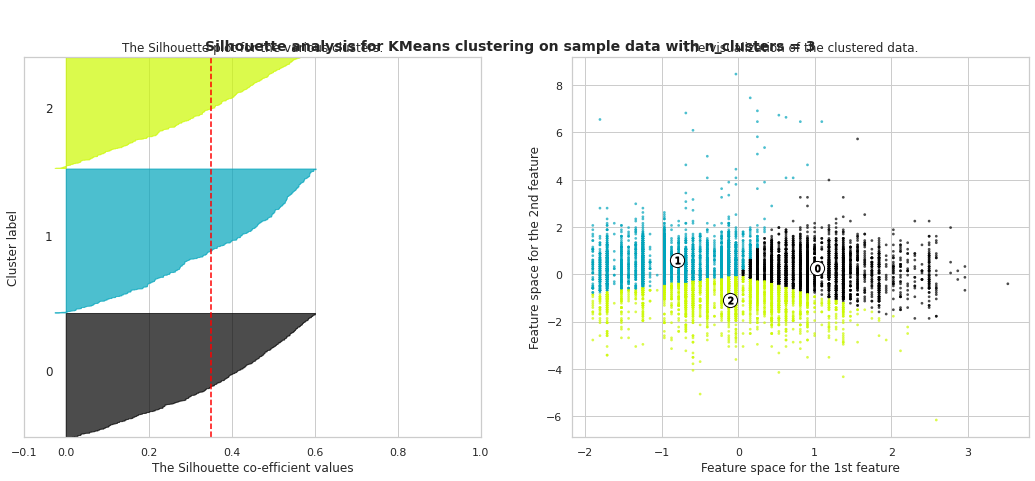

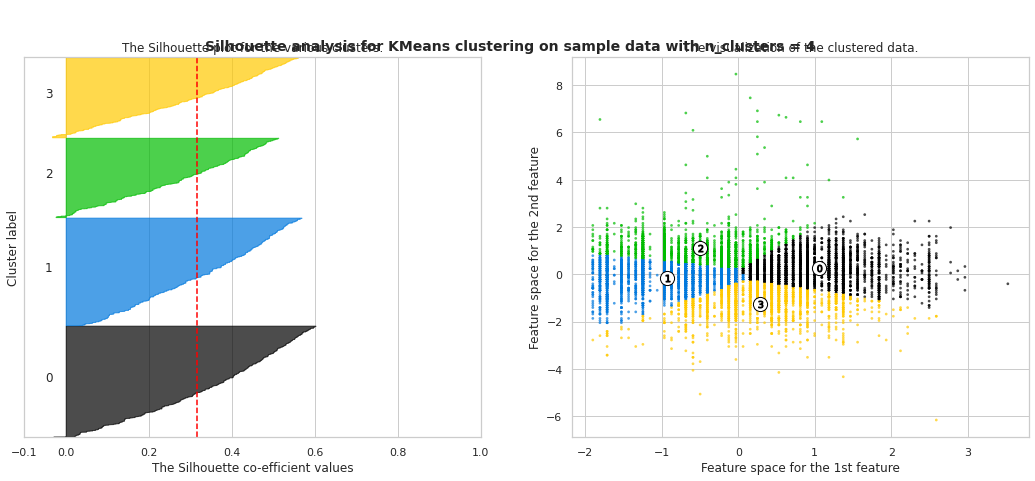

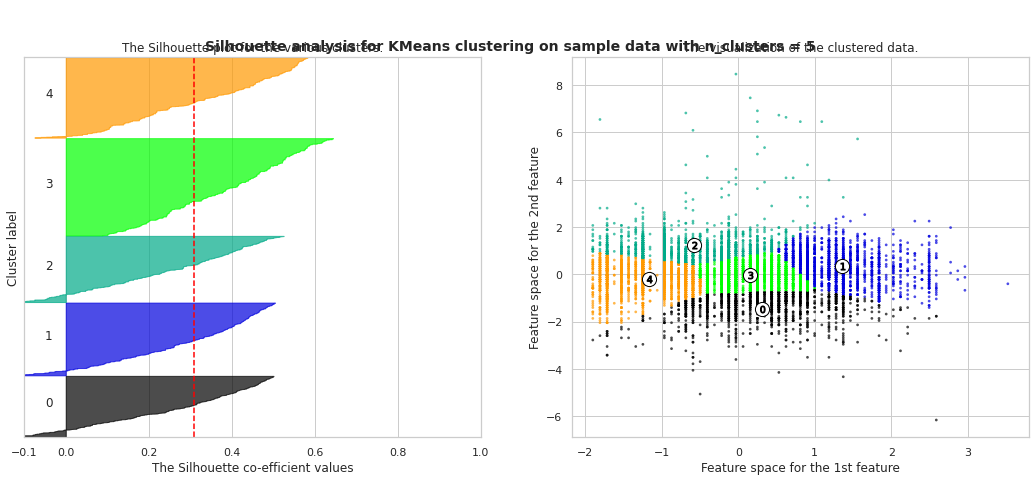

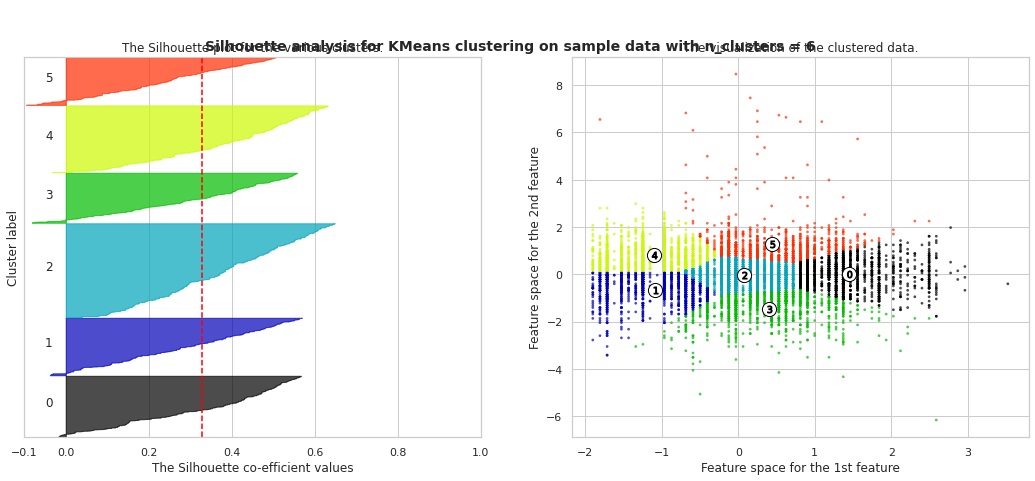

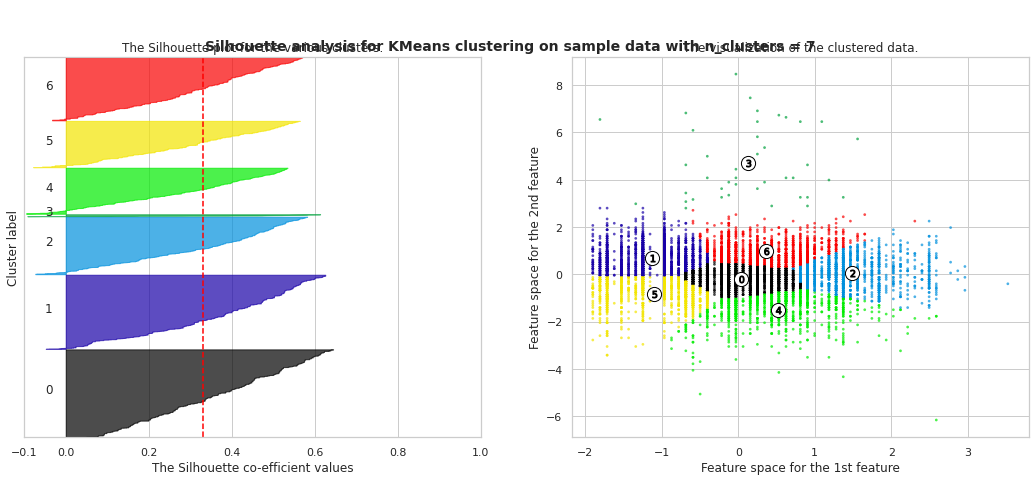

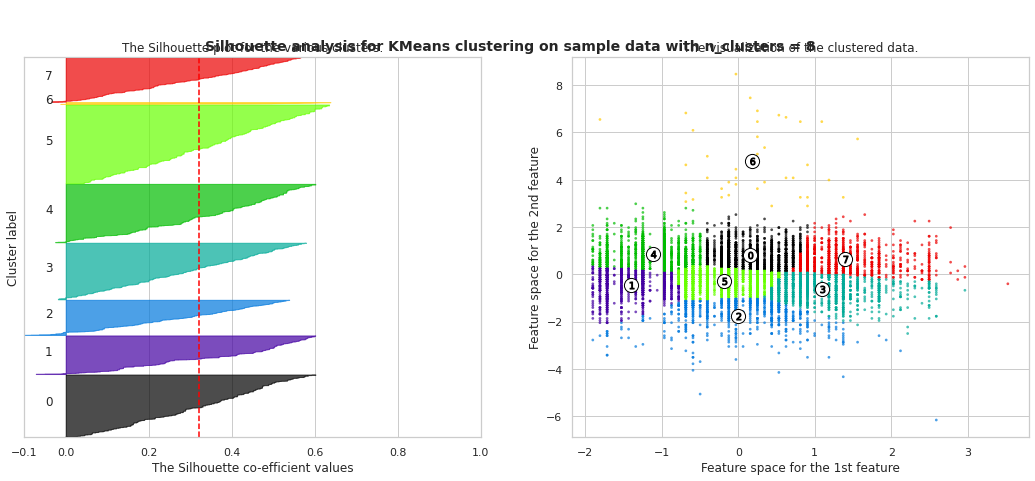

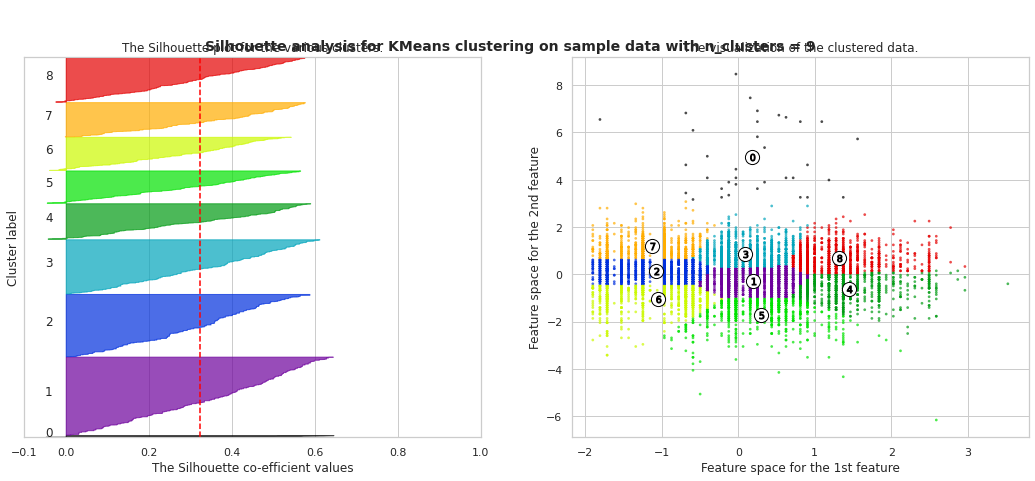

In [84]:
# Implementing and plotting K-Means for different values of 'n_clusters.
range_n_clusters= range(2,10)
X= X_scaled

for n in  range_n_clusters:
  # Create a subplot with 1 row and 2 columns.
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st plot is the silhouette plot, lie within the range[-0.1, 1].
  ax1.set_xlim([-0.1, 1])  
  # Inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X) + (n + 1) * 10])

  # Initializing KMeans clustering object with random_state= 10, and fitting the data set.
  clusterer = KMeans(n_clusters=n, random_state= 10)
  cluster_labels = clusterer.fit_predict(X)

  # Calculation of silhouette score and printing it
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(f"For n_clusters: {n}, and average silhouette_score is: {silhouette_avg}")

  # Calculation of silhouette score for each samples
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10
  for i in range(n):
      # Aggregate the silhouette scores for samples belonging to cluster i, and sort them.
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot 10 for the 0 samples
      y_lower = y_upper + 10

  ax1.set_title("The Silhouette plot for the various clusters.")
  ax1.set_xlabel("The Silhouette co-efficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
  ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")
  plt.suptitle(("\n\nSilhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n), fontsize=14, fontweight='bold')

plt.show()

### Plotting Elbow plot for K-Means

In [85]:
# Importing dependencies to plot Elbow plot for K-Means.
from yellowbrick.cluster import KElbowVisualizer

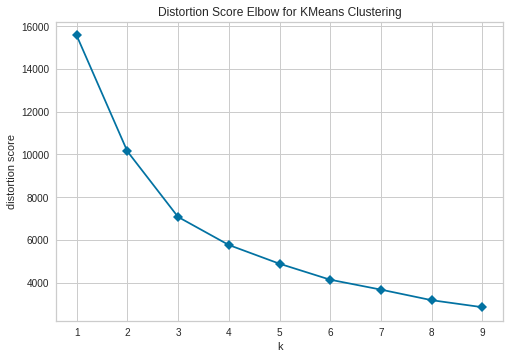

In [86]:
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,10), metric='distortion', timings=False, locate_elbow=False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [87]:
# Silhouette score for different values of n_clusters using KMeans
create_silhuouette_scores_table(X, KMeans, range(2,12))

+------------+------------------+
| n_clusters | silhouette_score |
+------------+------------------+
|     2      |      0.3363      |
|     3      |      0.3494      |
|     4      |      0.3176      |
|     5      |      0.3084      |
|     6      |      0.3228      |
|     7      |      0.3222      |
|     8      |      0.3223      |
|     9      |      0.3239      |
|     10     |      0.3261      |
|     11     |      0.3235      |
+------------+------------------+


###Observations from K-Means:

K-Means is a basic and useful Unsupervised Machine Learning algorithm for clustering.

From the above K-Means implementation, we observed the following,
* We have done fitting the model for the number of clusters ranging from 2 to 10.
* Silhouette score is a metric used to evaluate the quality of the clusters, from the silhouette score we cannot get any direct conclusions, since there are only minimal changes between the values.
* But when we plot the elbow plot, we can clearly see there is a sudden change in the plot at the value **3**, so we can take this as our elbow point.
